In [10]:
print("Hi")

Hi


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

In [12]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

DATASET IMPORT

In [13]:

df = pd.read_csv('crop_yield.csv')

print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Region                  1000000 non-null  object 
 1   Soil_Type               1000000 non-null  object 
 2   Crop                    1000000 non-null  object 
 3   Rainfall_mm             1000000 non-null  float64
 4   Temperature_Celsius     1000000 non-null  float64
 5   Fertilizer_Used         1000000 non-null  bool   
 6   Irrigation_Used         1000000 non-null  bool   
 7   Weather_Condition       1000000 non-null  object 
 8   Days_to_Harvest         1000000 non-null  int64  
 9   Yield_tons_per_hectare  1000000 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(4)
memory usage: 62.9+ MB
None


In [14]:

print("\nFirst few rows of the dataset:")
print(df.head())

X = df.drop(columns=['Region', 'Yield_tons_per_hectare'])

y = df['Yield_tons_per_hectare']


First few rows of the dataset:
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.5

In [15]:

preprocessor = ColumnTransformer(
    transformers=[
        ('soil_crop_weather', OneHotEncoder(), ['Soil_Type', 'Crop', 'Weather_Condition'])
    ], remainder='passthrough'
)

In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

EVALUATION

In [ ]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.25078143269341396
R^2 Score: 0.9130121183960368


In [19]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


PREDICTION

In [20]:
new_input = {
    'Soil_Type': ['Clay'],
    'Crop': ['Rice'],
    'Rainfall_mm': [700],
    'Temperature_Celsius': [28],
    'Fertilizer_Used': [False],
    'Irrigation_Used': [False],
    'Weather_Condition': ['Sunny'],
    'Days_to_Harvest': [120]
}

new_input_df = pd.DataFrame(new_input)

new_yield_prediction = pipeline.predict(new_input_df)
print(f"\nPredicted Yield for the new input: {new_yield_prediction[0]} tons per hectare")


Predicted Yield for the new input: 4.063999652862549 tons per hectare


SAVING THE MODEL

In [ ]:
#import joblib
#joblib.dump(pipeline, 'yield_prediction_model.pkl')

['yield_prediction_model.pkl']

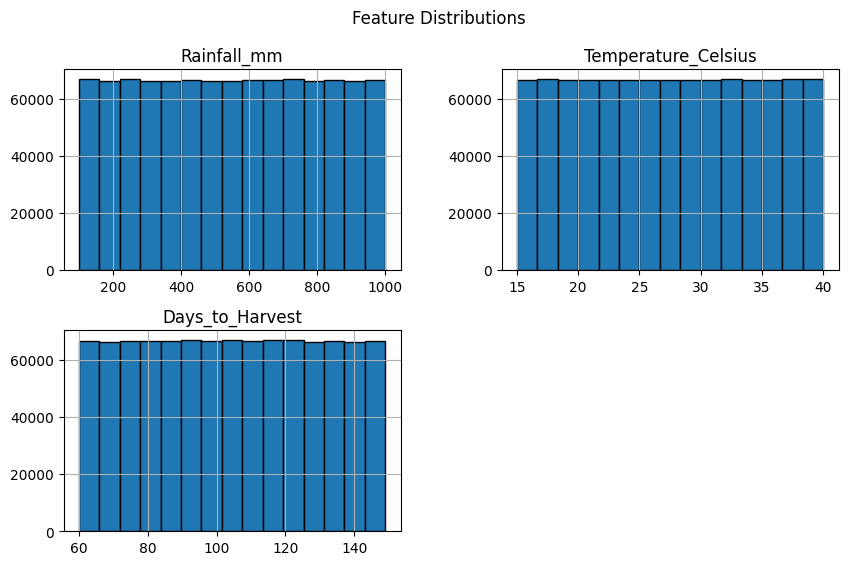

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
df[numerical_features].hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


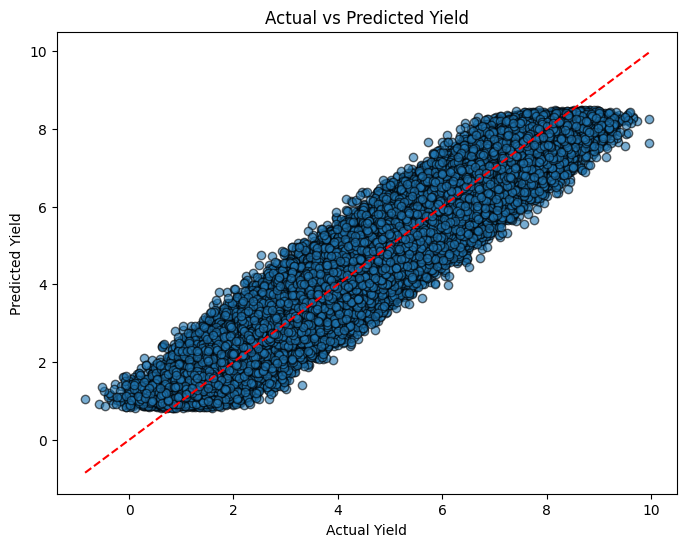

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.show()


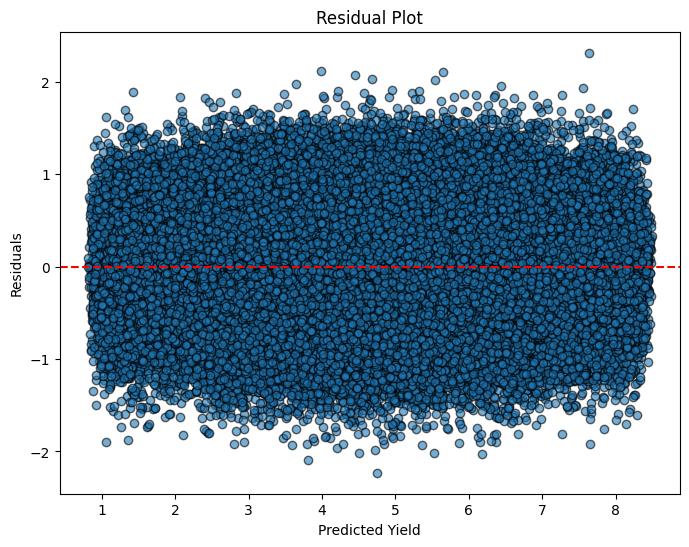

In [25]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


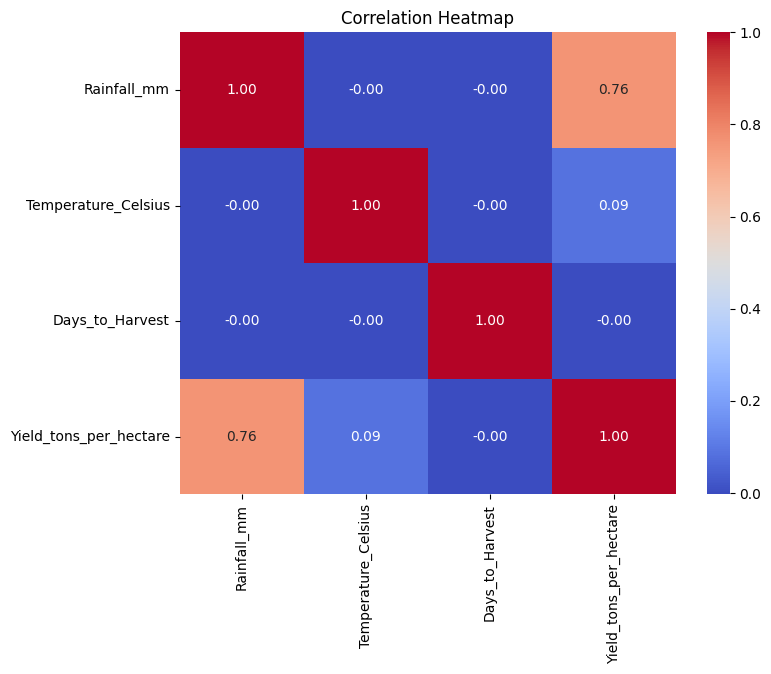

In [29]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


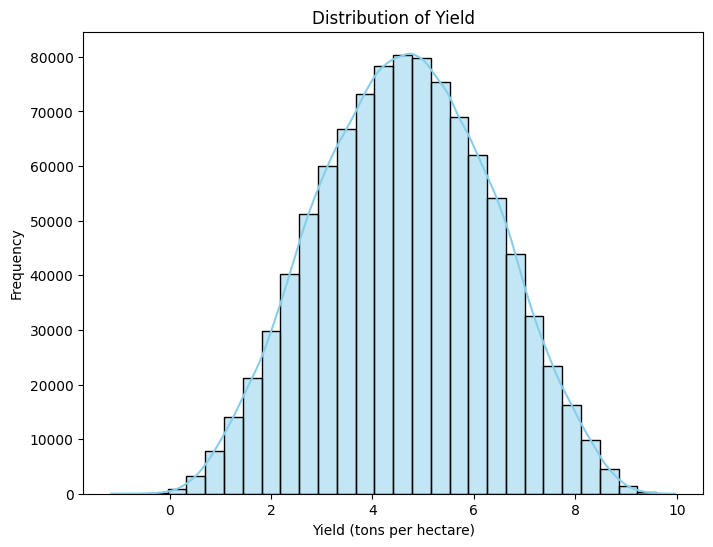

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Yield_tons_per_hectare'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Yield')
plt.xlabel('Yield (tons per hectare)')
plt.ylabel('Frequency')
plt.show()


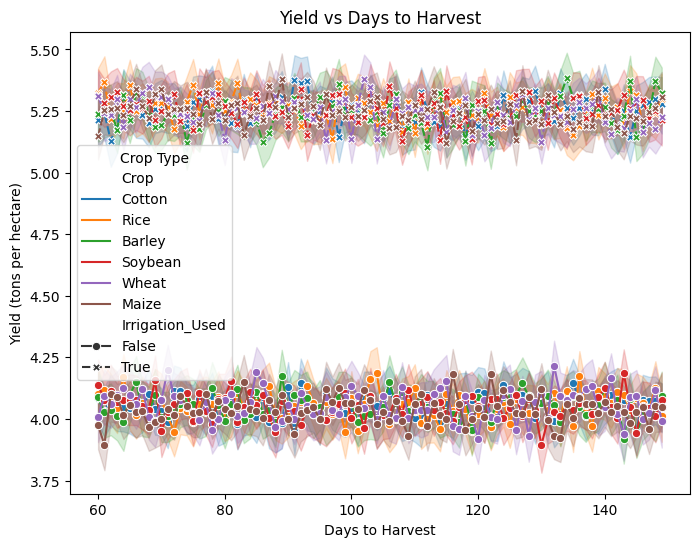

In [39]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='Days_to_Harvest', y='Yield_tons_per_hectare', hue='Crop', style='Irrigation_Used', markers=True)
plt.title('Yield vs Days to Harvest')
plt.xlabel('Days to Harvest')
plt.ylabel('Yield (tons per hectare)')
plt.legend(title='Crop Type')
plt.show()
